## Sales Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

### read the Sales of 12 Months 
Combine data from 12 months and read the data to analyse 

In [2]:

#directory_path = 'SalesData/*.csv'
#files = glob.glob(directory_path)
#dataSales = []

#for file in files:
    #df =pd.read_csv(file)
    #dataSales.append(df)
    
#AllDataSales = pd.concat(dataSales, ignore_index=True)
#AllDataSales.to_csv ("CombinedSalesData.csv", index = False) 


In [3]:
df = pd.read_csv("CombinedSalesData.csv")

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning Data

In [5]:
df.shape

(186850, 6)

In [6]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [7]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

 ### Check for null values in the DataFrame

In [9]:
#Creating a boolean mask for rows with at least one NaN value
null_mask = df.isnull().any(axis=1)
df[null_mask]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


#### as we can see there is a NaN value in our data frame 
lest's Drop rows with any NaN values

In [10]:
null_mask = df.isnull().any(axis=1)
df[~null_mask] 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [11]:
df.dropna(inplace = True) 
#By using inplace=True, the changes are applied directly to the original DataFrame

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### visualize null values in  our DataFrame using sns.heatmap

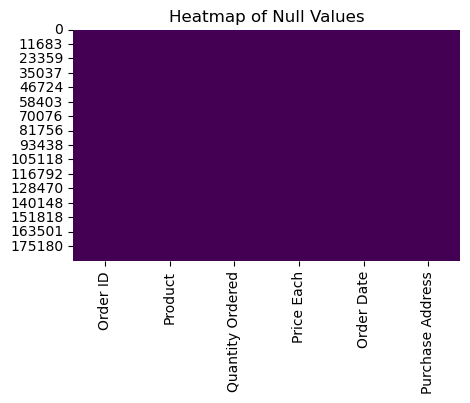

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))  # Setting the figure size
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values')
plt.show()

## what is the best month for sales ? and how much was earned that month ? 
##### to know the best month for sales we have to add a new column Month . also we have to claculat the total Price by adding a new column 

###  1. Add Month Column

In [14]:
newdf = df[['Order Date']]
newdf.head(100)

,Order Date
0,04/19/19 08:46
2,04/07/19 22:30
3,04/12/19 14:38
4,04/12/19 14:38
5,04/30/19 09:27
...,...
96,04/09/19 08:49
97,04/12/19 16:47
98,04/07/19 13:14
99,04/09/19 20:04


In [15]:
#df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

# Extract month and create a new column 'Order Month'
#df['Order Month'] = df['Order Date'].dt.month
# i got error and i don't know why if have any idea contact me please

In [16]:
df[df['Order Date'] =='Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### i just notice that there is some duplicated columns 

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df[df['Order Date'] =='Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [19]:
df = df[df['Order ID'] != 'Order ID']

# Resetting the index after removing the row
df.reset_index(drop=True, inplace=True)

In [20]:
df[df['Order Date'] =='Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

# Extract month and create a new column 'Order Month'
df['Order Month'] = df['Order Date'].dt.month

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### 2. add a Total Price Columns 

In [23]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
Order Month                  int64
dtype: object

In [24]:
df["Price Each"] = df["Price Each"].astype(float)

In [25]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)

In [26]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Order Month                  int64
dtype: object

In [27]:
df['Total Price'] = df["Quantity Ordered"] * df["Price Each"]

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Price
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [29]:
df.describe()

,Quantity Ordered,Price Each,Order Month,Total Price
count,185686.000000,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,7.058653,185.611936
std,0.443069,332.843838,3.502932,333.032118
min,1.000000,2.990000,1.000000,2.990000
25%,1.000000,11.950000,4.000000,11.950000
50%,1.000000,14.950000,7.000000,14.950000
75%,1.000000,150.000000,10.000000,150.000000
max,9.000000,1700.000000,12.000000,3400.000000


### group by 'Order Month' and and sum the 'Total Price' for each month

In [30]:
#group by 'Order Month' and and sum the 'Total Price' for each month
monthly_sales =df.groupby('Order Month')['Total Price'].sum()
# find the index of the max value in 'Total Price'
best_month = monthly_sales.idxmax()
total_earnings = monthly_sales.max()

# Mapping month numbers to their respective names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 
               9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# Get the name of the best month
best_month_name = month_names[best_month]
print(f"The best Month for sales is {best_month_name} whit total eranings of {total_earnings: .2f}$")

The best Month for sales is December whit total eranings of  4608295.70$


## The best Month for sales is December whit total eranings of  4608295.70$

## 

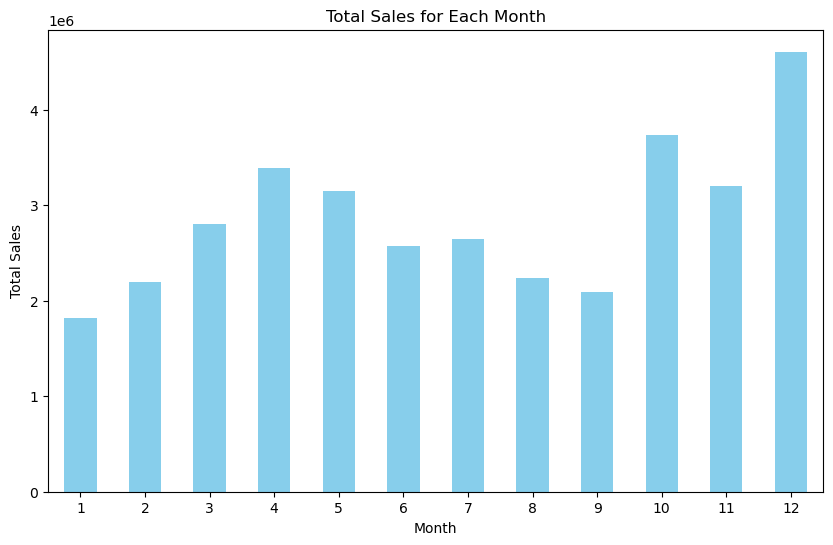

In [31]:
# Plotting the total sales for each month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  # Rotates x-axis labels
plt.show()

## what City sold the most Product ?
#### to find he name of city we have first add a column city (extarct the city name from Purchase Address)

In [32]:
# Extracting the city from 'Purchase Address' and creating a new 'City' column
df['City'] = df['Purchase Address'].apply(lambda x : x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [33]:
df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [34]:
df["City"].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [35]:
City_sales = df.groupby("City")["Quantity Ordered"].sum()
City_sales

City
 Atlanta          16584
 Austin           11137
 Boston           22494
 Dallas           16707
 Los Angeles      33247
 New York City    27903
 Portland         14037
 San Francisco    50169
 Seattle          16534
Name: Quantity Ordered, dtype: int32

In [36]:
# Find the city with the highest sales
best_city = City_sales.idxmax()
total_sales = City_sales.max()

print(f"The city that sold the most is {best_city} with total sales of {total_sales}")

The city that sold the most is  San Francisco with total sales of 50169


### The city that sold the most is  San Francisco with total sales of 50169

### 

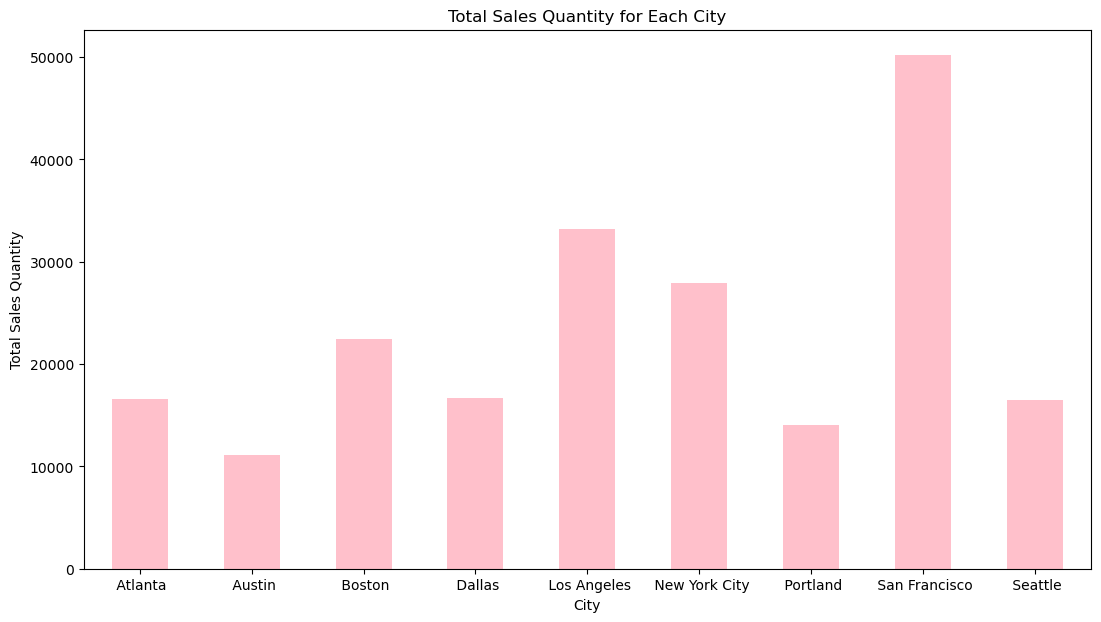

In [37]:
# Plotting the total sales for each month
plt.figure(figsize=(13, 7))
City_sales.plot(kind='bar', color='pink')
plt.title('Total Sales Quantity for Each City')
plt.xlabel('City')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=0)  # Rotates x-axis labels
plt.show()

### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [38]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Price,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [39]:
df['Time'] = df['Order Date'].dt.hour

In [40]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Price,City,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
185682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
185683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
185684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [41]:
time_sales = df.groupby('Time')['Quantity Ordered'].sum()

In [42]:
time_sales

Time
0      4420
1      2616
2      1397
3       927
4       935
5      1492
6      2809
7      4547
8      6998
9      9808
10    12292
11    13986
12    14188
13    13671
14    12343
15    11375
16    11636
17    12214
18    13785
19    14451
20    13758
21    12228
22     9884
23     7052
Name: Quantity Ordered, dtype: int32

In [43]:
# Find the city with the highest sales
best_time = time_sales.idxmax()
total_sales = time_sales.max()

print(f"The best time to display advertisements is around {best_time} with total sales of {total_sales}")

The best time to display advertisements is around 19 with total sales of 14451


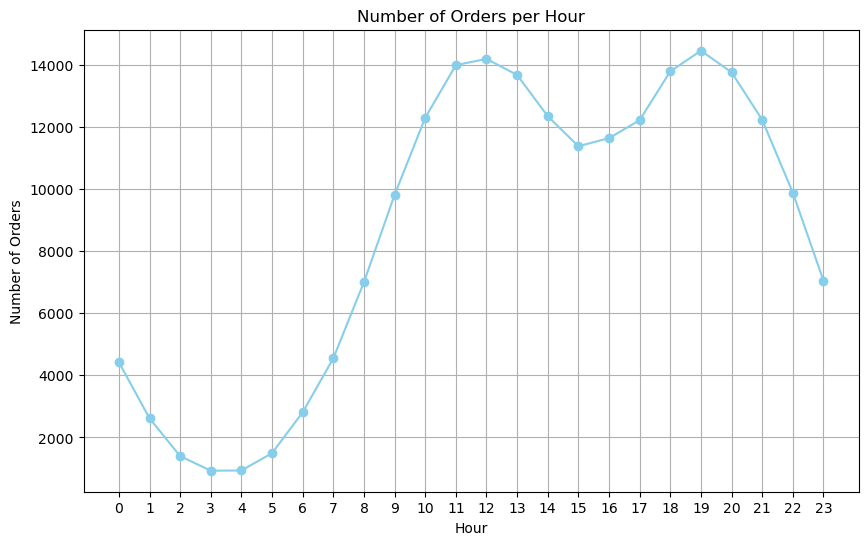

In [45]:
# Plotting the total sales for each month
plt.figure(figsize=(10, 6))
time_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Orders per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(time_sales.index)  # Set x-axis ticks to the hour values
plt.grid(True)  # Add a grid for better readability
plt.show()

#### The visualization represents the distribution of orders throughout the day, indicating the number of purchases made at different hours. The data illustrates distinct peaks in the number of orders at approximately 11 AM and around 7 PM.
###### 11 AM marks a prominent surge, likely corresponding to mid-morning hours when individuals might be taking breaks, planning their day, or engaging in online activities. Additionally, the peak at 7 PM aligns with the evening period, a time when people might be at home, possibly relaxing after work, and exploring online shopping opportunities.

## the number of orders per hour for each city separately

In [46]:
# Group by 'City' and 'Time', count the number of orders for each city and hour
hourly_orders_city = df.groupby(['Time', 'City'])["Quantity Ordered"].sum().unstack()
hourly_orders_city

City,Atlanta,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
Time,,,,,,,,,
0,357,218,507,326,699,635,301,1066,311
1,236,149,239,186,444,369,175,632,186
2,116,80,132,99,224,185,93,350,118
3,68,60,85,79,129,118,61,242,85
4,88,48,94,64,143,118,64,232,84
5,113,78,143,113,225,233,104,378,105
6,205,150,332,219,412,377,169,711,234
7,404,256,449,371,726,576,312,1103,350
8,572,374,767,592,1093,960,457,1644,539


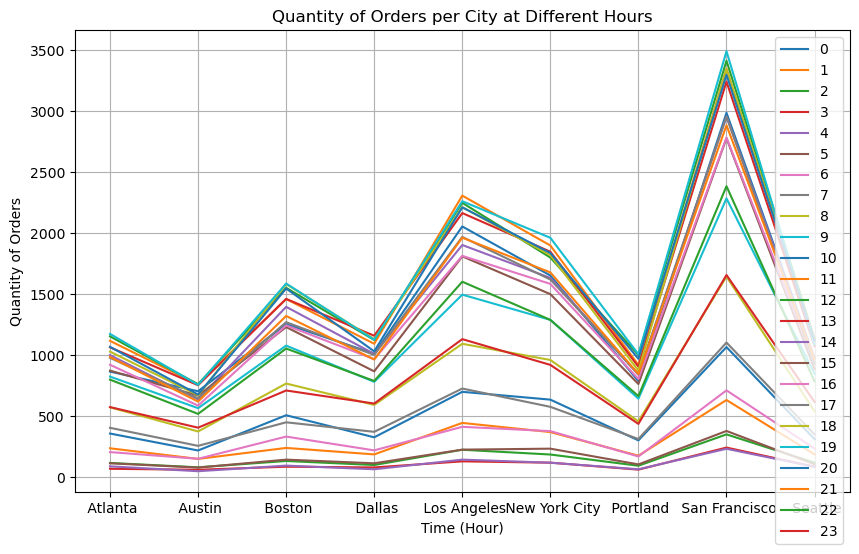

In [47]:
# Plotting
plt.figure(figsize=(10, 6))

for city in hourly_orders_city.index:
    plt.plot(hourly_orders_city.columns, hourly_orders_city.loc[city], label=city)

plt.xlabel('Time (Hour)')
plt.ylabel('Quantity of Orders')
plt.title('Quantity of Orders per City at Different Hours')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Price,City,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
185682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
185683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
185684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


## What products are most often sold together?


### Step 1: Identify Orders with Multiple Products
##### The first step is to identify the orders where more than one product was purchased together. This is determined by finding rows in the dataset that share the same Order ID

In [49]:
# Extracting rows with duplicate Order IDs
duplicate_orders = df[df.duplicated(subset='Order ID', keep=False)]

### Step 2: Group Products by Order ID
Next, we group the products together for each Order ID to understand what items were purchased together in each order.

In [50]:
grouped_orders = duplicate_orders.groupby('Order ID')['Product'].apply(list)

###  Step 3: Count Product Combinations
In this step, the code counts the frequency of combinations of products within the same order.

In [51]:
from collections import Counter

product_combinations = Counter()

for products in grouped_orders:
    for i in range(len(products) - 1):
        for j in range(i + 1, len(products)):
            product_combinations[(products[i], products[j])] += 1


### Step 4: Extract the Most Common Product Combinations
The final step is to retrieve the most common product combinations by sorting the counts.

In [52]:
most_common = product_combinations.most_common(10)
for key , value in most_common :
    print (key , value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sold the most? Why do you think it sold the most?

In [53]:
most_sold_prod= df.groupby('Product').sum()
most_sold_prod.head()

,Quantity Ordered,Price Each,Order Month,Total Price,Time
Product,,,,,
20in Monitor,4126,450739.02,29319,453818.74,58729
27in 4K Gaming Monitor,6239,2427687.75,44396,2433147.61,90841
27in FHD Monitor,7541,1124625.02,52484,1131074.59,107422
34in Ultrawide Monitor,6192,2346058.26,43258,2352898.08,88957
AA Batteries (4-pack),27615,78942.72,145423,106041.60,298077


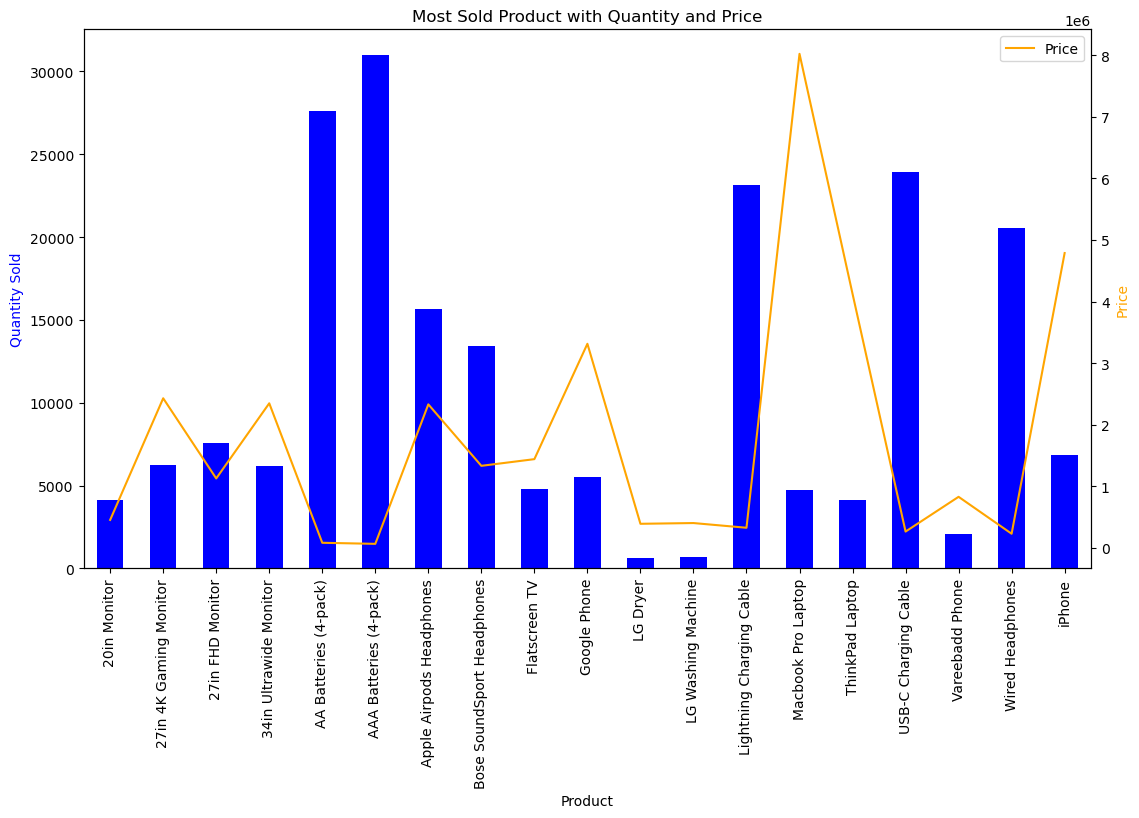

In [56]:
plt.figure(figsize=(13, 7))

# Plotting quantity sold
most_sold_prod['Quantity Ordered'].plot(kind='bar', color='blue', label='Quantity Sold')
plt.ylabel('Quantity Sold', color='blue')

# Adding a secondary y-axis for prices
plt.twinx()
most_sold_prod['Price Each'].plot(kind='line', color='orange', label='Price')
#most_sold_prod['Price Each'].plot(kind='bar', color='orange', label='Price')
plt.ylabel('Price', color='orange')

plt.title('Most Sold Product with Quantity and Price')
plt.xlabel('Product')
plt.legend()

plt.show()

### It's evident that the demand for certain products is linked to their affordability. For instance, products like AAA Batteries, considered more budget-friendly or essential, exhibit higher sales volumes, indicating a correlation between lower pricing and increased sales. On the other hand, items like the MacBook Pro Laptop, although prestigious and high in quality, show relatively lower sales figures. This trend suggests that the pricing of the MacBook Pro Laptop might be a factor limiting its purchase frequency, as its premium pricing potentially restricts its accessibility to a specific segment of customers.

### By Chaimaa Hassoune